<a href="https://colab.research.google.com/github/sharinair14/Basic-ML-Practice/blob/master/Kmeans_Clustering_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=pd.read_csv('/content/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_new=iris[['petal_length','petal_width']]

In [7]:
iris_new.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
from sklearn.cluster import KMeans

In [41]:
km=KMeans(n_clusters=3)

In [42]:
ypred=km.fit_predict(iris_new)

In [43]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int32)

In [44]:
iris_new['cluster']=ypred

In [45]:
iris_new.head()

,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [46]:
iris_new['cluster'].value_counts()

0    84
1    50
2    16
Name: cluster, dtype: int64

In [36]:
iris_new=iris_new.drop('ypred',axis=1)

KeyError: ignored

In [47]:
iris1=iris_new[iris_new['cluster']==0]
iris2=iris_new[iris_new['cluster']==1]
iris3=iris_new[iris_new['cluster']==2]


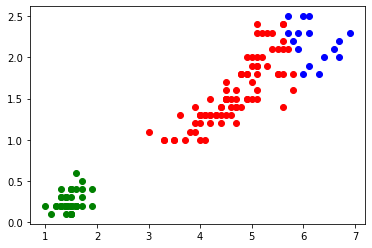

In [48]:
plt.scatter(iris1['petal_length'],iris1['petal_width'],color='red')
plt.scatter(iris2['petal_length'],iris2['petal_width'],color='green')
plt.scatter(iris3['petal_length'],iris3['petal_width'],color='blue')


Elbow Method

In [27]:
sse=[]
k=range(1,10)
for i in k:
  km=KMeans(n_clusters=i)
  km.fit(iris_new)
  sse.append(km.inertia_)

In [28]:
sse

[650.5368000000001,
 186.2934284016637,
 31.387758974358974,
 22.658843630443634,
 14.210707692307693,
 11.428596969696969,
 9.314874003189793,
 7.827224089635854,
 6.884481395797186]

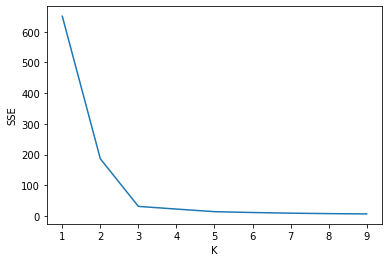

In [29]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k,sse)